# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

<span style="color:green"> EQUILIBRAZIONE: vedi sotto.

<span style="color:green"> Nelle simulazioni ho utilizzato unità ridotte; per avere i risultati nel sistema internazionale devo fare le seguenti conversioni:

<span style="color:green"> $$V = \epsilon V^{*}, \quad K = \epsilon K^{*}, \quad E = \epsilon E^{*}, \quad T = \frac{\epsilon}{k_B} T^{*}, \quad P = \frac{\epsilon}{\sigma^{3}} P^{*}$$

<span style="color:green"> ed essendo $\epsilon/k_B = 120 $ K, $\epsilon = 0.0103$ eV.

<span style="color:green"> Le misure con le loro incertezze sono state ottenute utilizzando il blocking method su 20 blocchi da 2000 passi di Verlet ciascuno.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#Fattori di conversione
epsilon = 0.0103 # in eV
rapp = 120       # in K (espilon/Kb)
sigma = 0.34     # in nm

### <span style="color:green"> Solido </span>

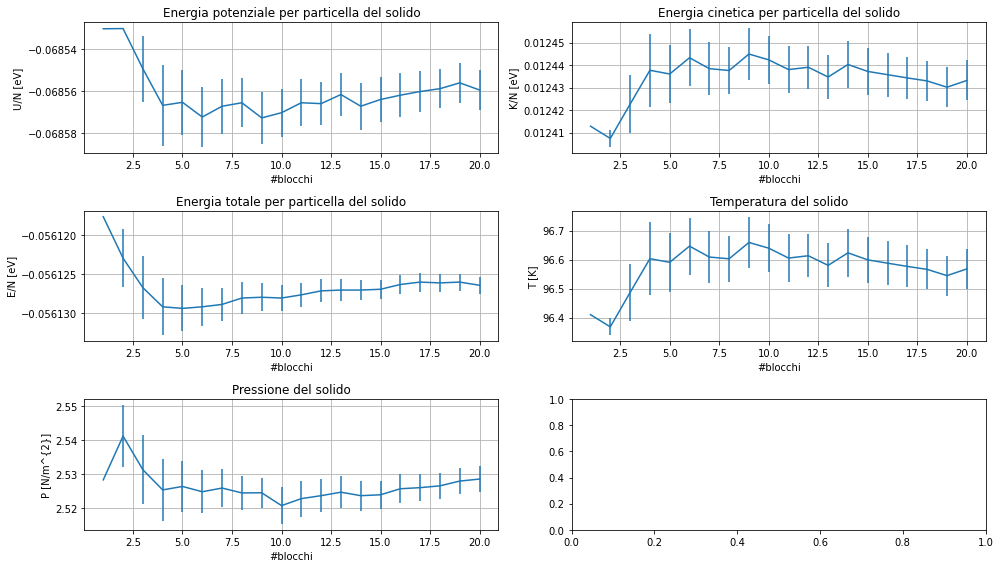

In [13]:
Epot, Epot_err = np.loadtxt("output_epotS.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Ekin, Ekin_err = np.loadtxt("output_ekinS.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Etot, Etot_err = np.loadtxt("output_etotS.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Temp, Temp_err = np.loadtxt("output_tempS.dat", delimiter=' ', usecols = (2,3), unpack='true') * rapp
Pres, Pres_err = np.loadtxt("output_presS.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon/pow(sigma,3)

fig, ax = plt.subplots(3, 2, figsize = (14, 8), tight_layout = True)
ax = ax.reshape(-1)

assex = [(i + 1) for i in range(20)]
valori = [Epot, Ekin, Etot, Temp, Pres]
errori = [Epot_err, Ekin_err, Etot_err, Temp_err, Pres_err]
simboli = ["U/N [eV]", "K/N [eV]", "E/N [eV]", "T [K]", "P [N/m^{2}]"]

for i in range(5):
    ax[i].errorbar(assex, valori[i], yerr = errori[i])
    ax[i].set_xlabel("#blocchi")
    ax[i].set_ylabel(simboli[i])
    ax[i].grid(True)
    
ax[0].set_title("Energia potenziale per particella del solido")
ax[1].set_title("Energia cinetica per particella del solido")
ax[2].set_title("Energia totale per particella del solido")
ax[3].set_title("Temperatura del solido")
ax[4].set_title("Pressione del solido")
plt.show()

### <span style="color:green"> Liquido </span>

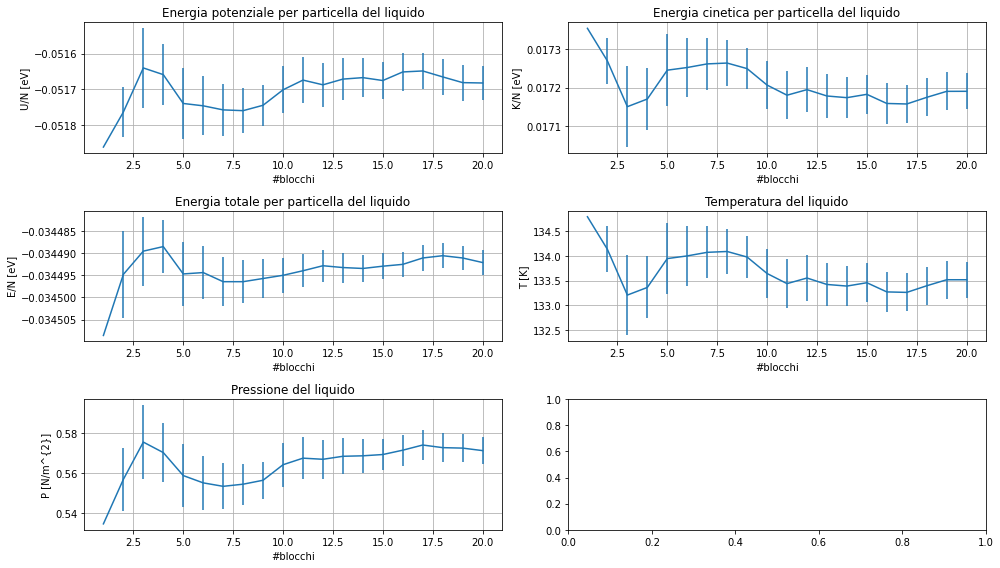

In [14]:
Epot, Epot_err = np.loadtxt("output_epotL.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Ekin, Ekin_err = np.loadtxt("output_ekinL.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Etot, Etot_err = np.loadtxt("output_etotL.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Temp, Temp_err = np.loadtxt("output_tempL.dat", delimiter=' ', usecols = (2,3), unpack='true') * rapp
Pres, Pres_err = np.loadtxt("output_presL.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon/pow(sigma,3)

fig, ax = plt.subplots(3, 2, figsize = (14, 8), tight_layout = True)
ax = ax.reshape(-1)

assex = [(i + 1) for i in range(20)]
valori = [Epot, Ekin, Etot, Temp, Pres]
errori = [Epot_err, Ekin_err, Etot_err, Temp_err, Pres_err]
simboli = ["U/N [eV]", "K/N [eV]", "E/N [eV]", "T [K]", "P [N/m^{2}]"]

for i in range(5):
    ax[i].errorbar(assex, valori[i], yerr = errori[i])
    ax[i].set_xlabel("#blocchi")
    ax[i].set_ylabel(simboli[i])
    ax[i].grid(True)
    
ax[0].set_title("Energia potenziale per particella del liquido")
ax[1].set_title("Energia cinetica per particella del liquido")
ax[2].set_title("Energia totale per particella del liquido")
ax[3].set_title("Temperatura del liquido")
ax[4].set_title("Pressione del liquido")
plt.show()

### <span style="color:green"> Gas </span>

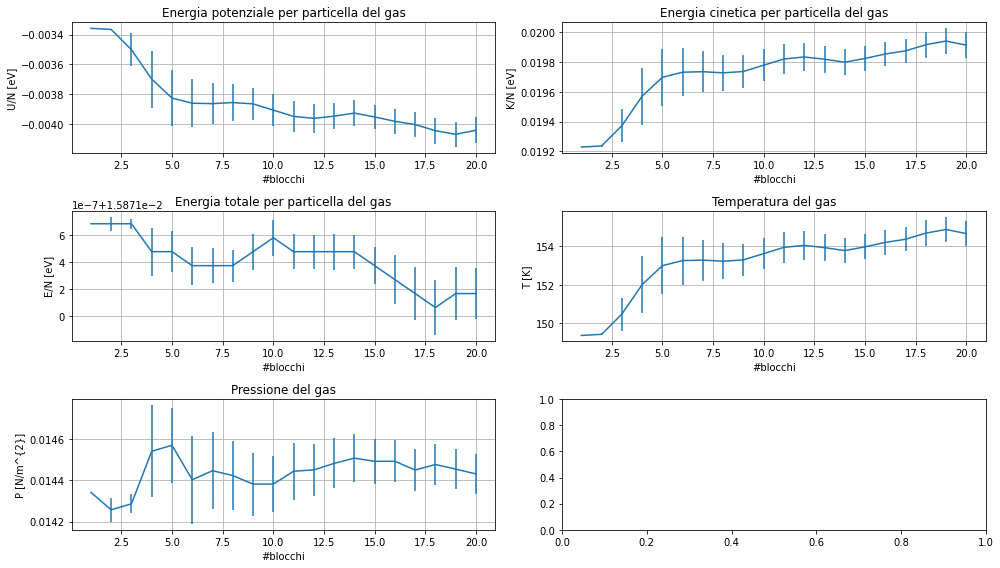

In [25]:
Epot, Epot_err = np.loadtxt("output_epotG.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Ekin, Ekin_err = np.loadtxt("output_ekinG.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Etot, Etot_err = np.loadtxt("output_etotG.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon
Temp, Temp_err = np.loadtxt("output_tempG.dat", delimiter=' ', usecols = (2,3), unpack='true') * rapp
Pres, Pres_err = np.loadtxt("output_presG.dat", delimiter=' ', usecols = (2,3), unpack='true') * epsilon/pow(sigma,3)

fig, ax = plt.subplots(3, 2, figsize = (14, 8), tight_layout = True)
ax = ax.reshape(-1)

assex = [(i + 1) for i in range(20)]
valori = [Epot, Ekin, Etot, Temp, Pres]
errori = [Epot_err, Ekin_err, Etot_err, Temp_err, Pres_err]
simboli = ["U/N [eV]", "K/N [eV]", "E/N [eV]", "T [K]", "P [N/m^{2}]"]

for i in range(5):
    ax[i].errorbar(assex, valori[i], yerr = errori[i])
    ax[i].set_xlabel("#blocchi")
    ax[i].set_ylabel(simboli[i])
    ax[i].grid(True)
    
ax[0].set_title("Energia potenziale per particella del gas")
ax[1].set_title("Energia cinetica per particella del gas")
ax[2].set_title("Energia totale per particella del gas")
ax[3].set_title("Temperatura del gas")
ax[4].set_title("Pressione del gas")
plt.show()

<span style="color:green"> In unità del SI le temperature attese per le tre fasi si calcolano moltiplicando $T^\star$ per $120K$, ottenendo $T = 96K$ per la fase solida, $T = 132K$ per la fase liquida e $T = 144K$ per la fase gassosa.
Nel caso della fase solida e liquida i risultati ottenuti rispettano i valori attesi, mentre le temperature della fase gassosa sono più alte di quelle previste, probabilmente perchè, mentre nell'equilibrazione della fase solida e liquida la temperatura si stabilizza, nella fase gassosa la temperatura desiderata viene raggiunta, ma in modo meno stabile, con la tendenza a crescere.

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

<span style="color:green"> In tutte e tre le equilibrazioni ho eseguito 2000 passi di Verlet partendo dalla configurazione fcc e dai dati di input $\rho^\star$ e $r_{c}^\star$ relativi a ciascuna delle tre fasi. Come temperature iniziali ho utilizzato $T^\star = 1.55$ per la fase solida, $T^\star = 2$ per la fase liquida e $T^\star = 1.05$ per la fase gassosa.

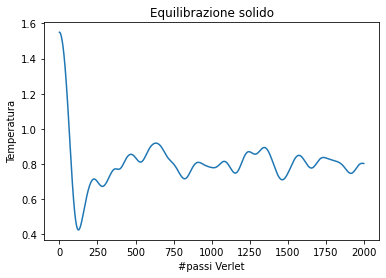

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 2000
x = np.arange(N)
y = np.loadtxt("Equil_solid.dat")  
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Equilibrazione solido')
ax.set_xlabel('#passi Verlet')
ax.set_ylabel('Temperatura')

plt.show()

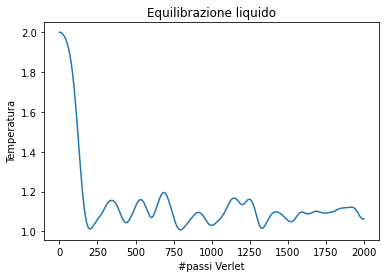

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 2000
x = np.arange(N)
y = np.loadtxt("Equil_liquid.dat")  
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Equilibrazione liquido')
ax.set_xlabel('#passi Verlet')
ax.set_ylabel('Temperatura')

plt.show()

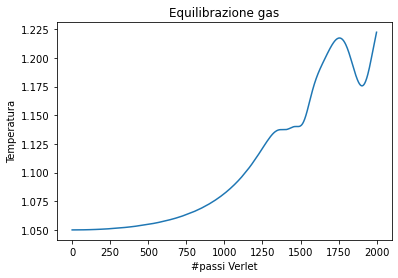

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 2000
x = np.arange(N)
y = np.loadtxt("Equil_gas.dat")  
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Equilibrazione gas')
ax.set_xlabel('#passi Verlet')
ax.set_ylabel('Temperatura')

plt.show()

<span style="color:green"> In tutti e tre i casi dopo 2000 passi di Verlet il sistema ha raggiunto la temperatura desiderata (solido: $T^\star = 0.8$, liquido: $T^\star = 1.1$, gas: $T^\star = 1.2$); ho fatto partire quindi la misurazione in tutti e tre i casi dalla temperatura raggiunta al passo 2000 e dalla rispettiva configurazione.
